## 투빅스 18기 Week4 KNN 과제 - 18기 이다인

## KNN 구현해보기
### 1. Preprocssing / EDA
지금까지 배운 내용을 토대로 해당 데이터에 대해 자유롭게 전처리와 EDA를 진행해주세요.
### 2. KNN 구현 & 파라미터 튜닝
수업 내용 및 실습 자료를 참고하여 KNN을 구현하고 파라미터 튜닝을 하며 결과를 비교해주세요.
### 3. Evaluation
결과에 대한 평가를 진행하고, 나름의 해석을 달아주세요.

**데이터:** [blackfriday | Kaggle](https://www.kaggle.com/llopesolivei/blackfriday)

---

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore") 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 0. 데이터 불러오기

In [2]:
import pandas as pd
df = pd.read_csv("blackfriday.csv", index_col = 0)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1001088,P00046042,F,0-17,10,A,3,0,5,17.0,NaN,2010
1,1004493,P00347742,F,0-17,10,A,1,0,7,NaN,NaN,4483
2,1005302,P00048942,F,0-17,10,A,1,0,1,4.0,NaN,7696
3,1001348,P00145242,F,0-17,10,A,3,0,2,4.0,NaN,16429
4,1001348,P00106742,F,0-17,10,A,3,0,3,5.0,NaN,5780


## 1. 데이터 전처리 및 EDA

### 1.1 데이터 전처리

In [3]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,4.998000e+03,4998.000000,4998.000000,4998.000000,3465.000000,1544.000000,4998.000000
mean,1.003015e+06,8.036815,0.421369,5.320128,9.773737,12.766839,9234.655462
std,1.709910e+03,6.442697,0.493828,3.912281,5.101867,4.023591,4999.225081
min,1.000003e+06,0.000000,0.000000,1.000000,2.000000,3.000000,13.000000
25%,1.001560e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5497.750000
50%,1.003040e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8049.000000
75%,1.004417e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12039.000000
max,1.006037e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23913.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 4997
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     4998 non-null   int64  
 1   Product_ID                  4998 non-null   object 
 2   Gender                      4998 non-null   object 
 3   Age                         4998 non-null   object 
 4   Occupation                  4998 non-null   int64  
 5   City_Category               4998 non-null   object 
 6   Stay_In_Current_City_Years  4998 non-null   object 
 7   Marital_Status              4998 non-null   int64  
 8   Product_Category_1          4998 non-null   int64  
 9   Product_Category_2          3465 non-null   float64
 10  Product_Category_3          1544 non-null   float64
 11  Purchase                    4998 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 507.6+ KB


In [5]:
for i in range(len(df.columns)):
    print(df.columns[i])
    print(df[df.columns[i]].unique())
    print()

User_ID
[1001088 1004493 1005302 ... 1001176 1003015 1000837]

Product_ID
['P00046042' 'P00347742' 'P00048942' ... 'P00267142' 'P00085842'
 'P00358242']

Gender
['F' 'M']

Age
['0-17' '18-25' '26-35' '36-45' '46-50' '51-55' '55+']

Occupation
[10  2  0 19  1  7 12  8  4  9  3 20 15 14 16 17  5  6 11 18 13]

City_Category
['A' 'B' 'C']

Stay_In_Current_City_Years
['3' '1' '2' '4+' '0']

Marital_Status
[0 1]

Product_Category_1
[ 5  7  1  2  3  8 16 14 10 19 11 12  4 17 15  6 13 20 18  9]

Product_Category_2
[17. nan  4.  5. 15.  8. 12. 11.  2. 14.  3. 18. 16.  6. 13. 10.  9.  7.]

Product_Category_3
[nan  9.  5. 15.  8. 14. 16. 17.  4. 18. 12. 13.  6. 10. 11.  3.]

Purchase
[ 2010  4483  7696 ... 11701  2045  1413]



* 12개의 column으로 이루어진 고객 신상 데이터이다.
* `User_ID`는 의미있는 변수가 아니기 때문에 제거해주기로 하였다.
* `Product_Category_2 `, `Product_Category_3`에 결측치가 확인되어서 따로 처리해주어야 한다.
* 카테고리형 변수는 후에 one-hot encoding을 통해 변환할 필요가 있다.

* **Target 변수**: `Gender` 
-타켓변수는 성별로 잡고 진행하였다.

In [6]:
df = df.drop("User_ID", axis=1)

In [7]:
# 결측치 확인
df.isnull().sum()

Product_ID                       0
Gender                           0
Age                              0
Occupation                       0
City_Category                    0
Stay_In_Current_City_Years       0
Marital_Status                   0
Product_Category_1               0
Product_Category_2            1533
Product_Category_3            3454
Purchase                         0
dtype: int64

<AxesSubplot:>

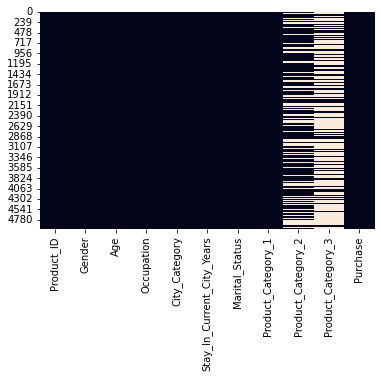

In [8]:
#결측치 시각화
sns.heatmap(df.isnull(), cbar=False)

* `Product_Category_3`의 경우 결측치의 수가 70%가 되기 때문에 제거하기로 하였다.
* `Product_Category_2`의 경우는 결측치의 수가 50%가 안되기 때문에 중앙값이나, 평균값으로 대체 해주는 것이 좋을 것 같다. => 이번에는 평균값으로 대체해보았다.

In [9]:
df = df.drop("Product_Category_3", axis=1)

In [10]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mean())

In [11]:
df.isnull().sum()

Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64

* 결측치가 사라진 것을 확인하였다.

### 1.2 one-hot encoding

* 실질적으로 수치형 변수인 것은 `purchase`가 유일하기 때문에, `Product_ID `,`Age`, `Occupation`, `City_Category` , `Stay_In_Current_City_Years` ,`Product_Category_1`, `Product_Category_2` 의 변수에 원핫인코딩을 진행하기로 하였다.
* `Gender`는 타켓변수이기 때문에 후에 라벨 인코딩을 진행해주었다.
* `product_ID`의 경우는 원핫인코딩을 진행하기에 그룹이 너무 많기 때문에 다시 자세히 살펴볼 필요가 있다.

In [12]:
df['Product_ID'].value_counts()

P00265242    21
P00220442    16
P00114942    15
P00010742    15
P00148642    15
             ..
P00072342     1
P00037842     1
P00207042     1
P00129742     1
P00358242     1
Name: Product_ID, Length: 1797, dtype: int64

In [13]:
df['Product_ID'].unique()

array(['P00046042', 'P00347742', 'P00048942', ..., 'P00267142',
       'P00085842', 'P00358242'], dtype=object)

* `product_ID`의 경우 앞에 4자리를 통해 더 간단한 범주화가 가능할 것이라고 판단하여 P001, P002, P003 등의 형태로 범주화를 진행해보았다.

In [14]:
df['Product_ID'] = df['Product_ID'].map(lambda x:x[:4])

In [15]:
df['Product_ID'].unique()

array(['P000', 'P003', 'P001', 'P002', 'P009'], dtype=object)

* 5개로 범주화가 된 것을 확인할 수 있다.

In [16]:
# 원-핫 인코딩 진행
from sklearn.preprocessing import OneHotEncoder

cate_list = ['Product_ID', 'Age', 'Occupation', 'City_Category', 
                 'Stay_In_Current_City_Years', 'Product_Category_1', 'Product_Category_2']
ohe_encoder = OneHotEncoder().fit(df[cate_list])     # One-Hot-Encoding
ohe_encoder.get_feature_names(cate_list)

array(['Product_ID_P000', 'Product_ID_P001', 'Product_ID_P002',
       'Product_ID_P003', 'Product_ID_P009', 'Age_0-17', 'Age_18-25',
       'Age_26-35', 'Age_36-45', 'Age_46-50', 'Age_51-55', 'Age_55+',
       'Occupation_0', 'Occupation_1', 'Occupation_2', 'Occupation_3',
       'Occupation_4', 'Occupation_5', 'Occupation_6', 'Occupation_7',
       'Occupation_8', 'Occupation_9', 'Occupation_10', 'Occupation_11',
       'Occupation_12', 'Occupation_13', 'Occupation_14', 'Occupation_15',
       'Occupation_16', 'Occupation_17', 'Occupation_18', 'Occupation_19',
       'Occupation_20', 'City_Category_A', 'City_Category_B',
       'City_Category_C', 'Stay_In_Current_City_Years_0',
       'Stay_In_Current_City_Years_1', 'Stay_In_Current_City_Years_2',
       'Stay_In_Current_City_Years_3', 'Stay_In_Current_City_Years_4+',
       'Product_Category_1_1', 'Product_Category_1_2',
       'Product_Category_1_3', 'Product_Category_1_4',
       'Product_Category_1_5', 'Product_Category_1_6',
   

In [17]:
ohe_data = pd.DataFrame(ohe_encoder.transform(df[cate_list]).toarray(),
                               index = df.index,
                               columns = ohe_encoder.get_feature_names(cate_list))

df2 = pd.concat([df, ohe_data], sort = False, axis = 1)
data = df2.drop(['Product_ID', 'Age', 'Occupation', 'City_Category',
                  'Stay_In_Current_City_Years', 'Product_Category_1', 'Product_Category_2'], axis = 1)

In [18]:
data.head()

,Gender,Marital_Status,Purchase,Product_ID_P000,Product_ID_P001,Product_ID_P002,Product_ID_P003,Product_ID_P009,Age_0-17,Age_18-25,...,Product_Category_2_9.773737373737374,Product_Category_2_10.0,Product_Category_2_11.0,Product_Category_2_12.0,Product_Category_2_13.0,Product_Category_2_14.0,Product_Category_2_15.0,Product_Category_2_16.0,Product_Category_2_17.0,Product_Category_2_18.0
0,F,0,2010,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,F,0,4483,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,F,0,7696,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,F,0,16429,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,F,0,5780,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 4997
Data columns (total 82 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Gender                                4998 non-null   object 
 1   Marital_Status                        4998 non-null   int64  
 2   Purchase                              4998 non-null   int64  
 3   Product_ID_P000                       4998 non-null   float64
 4   Product_ID_P001                       4998 non-null   float64
 5   Product_ID_P002                       4998 non-null   float64
 6   Product_ID_P003                       4998 non-null   float64
 7   Product_ID_P009                       4998 non-null   float64
 8   Age_0-17                              4998 non-null   float64
 9   Age_18-25                             4998 non-null   float64
 10  Age_26-35                             4998 non-null   float64
 11  Age_36-45        

* one-hot encoding이 진행된 것을 확인할 수 있다.

### 1.3 EDA

In [20]:
sns.set_palette('Pastel1')

<AxesSubplot:xlabel='Product_ID', ylabel='count'>

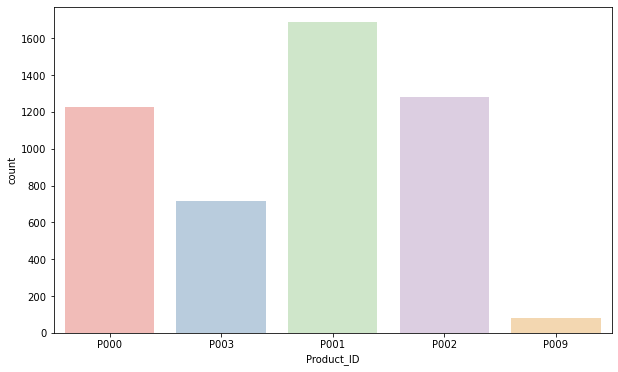

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Product_ID', data=df)

* 제품은 `P001`에 해당하는 제품이 가장 많은 것을 알 수 있므며, `P009`에 해당하는 제품이 가장 적다

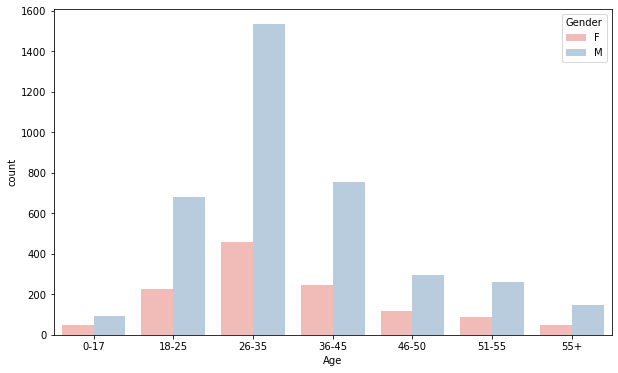

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Age', data=df, hue = 'Gender')
plt.show()

* 성별에 따른 나이를 그려보았을 때 대체적으로 남성의 구매가 훨씬 많은 것을 알 수 있으며, 나이대는 26-35 사이가 가장 높은 것을 알 수 있다.

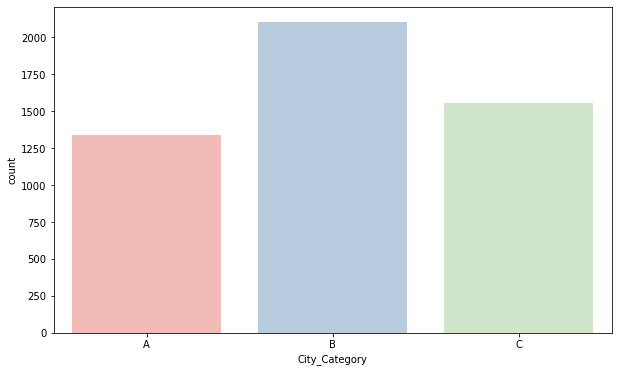

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(x='City_Category', data=df)
plt.show()

* 사는 지역의 경우 B지역이 가장 많은 것을 알 수 있다.

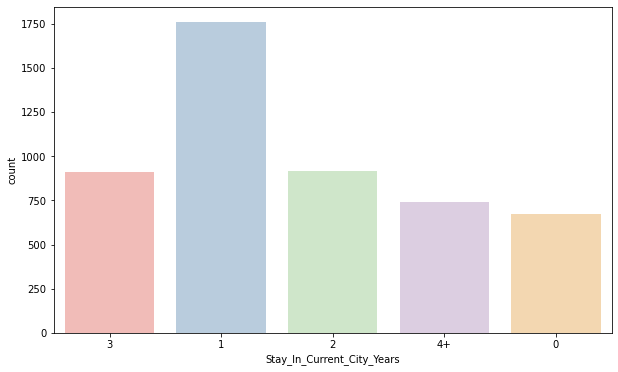

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Stay_In_Current_City_Years', data=df)
plt.show()

* 그 지역에 산 지 1년차인 사람들의 구매 비율이 월등하게 높은 것을 알 수있다.

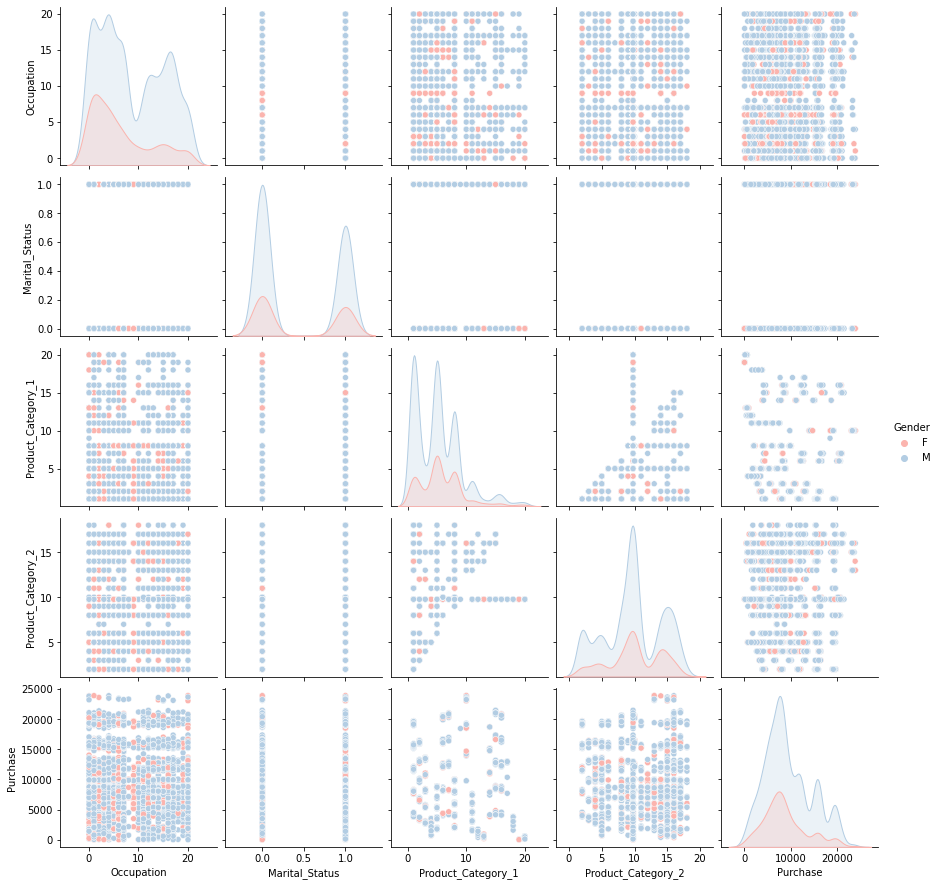

In [25]:
sns.pairplot(df, hue="Gender")
plt.show()

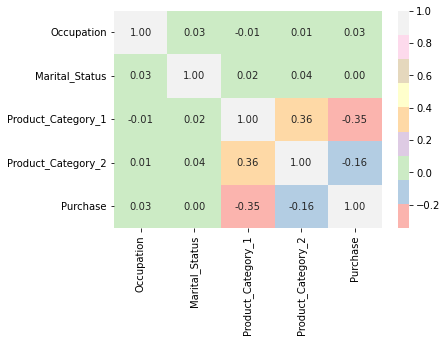

In [26]:
sns.heatmap(df.corr(), annot=True, fmt = '.2f', cmap='Pastel1')  
plt.show()

* 변수간의 상관관계를 보았을 때 높은 상관관계를 보이는 변수는 없는 것으로 파악된다.

## 2. KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

* **Target 변수**: `Gender`
* 타겟변수를 성별로 잡았기 때문에 KNN Regression이 아닌 KNN Classification을 사용해주어야 한다.

In [28]:
X = data.drop(['Gender'], axis = 1) 
y = data.Gender    # Target

In [29]:
# 타깃변수 Label Encoding
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
y = label.fit_transform(y)

### 2.1 scaling

In [30]:
# KNN은 거리기반 알고리즘이므로 Scaling을 진행하였다.
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit_transform(X)
X = pd.DataFrame(ss.fit_transform(X), columns = X.columns)
X.head()

,Marital_Status,Purchase,Product_ID_P000,Product_ID_P001,Product_ID_P002,Product_ID_P003,Product_ID_P009,Age_0-17,Age_18-25,Age_26-35,...,Product_Category_2_9.773737373737374,Product_Category_2_10.0,Product_Category_2_11.0,Product_Category_2_12.0,Product_Category_2_13.0,Product_Category_2_14.0,Product_Category_2_15.0,Product_Category_2_16.0,Product_Category_2_17.0,Product_Category_2_18.0
0,-0.853356,-1.445300,1.751206,-0.713802,-0.587362,-0.409582,-0.129152,5.956656,-0.47054,-0.815408,...,-0.665150,-0.077709,-0.150014,-0.089821,-0.144338,-0.331924,-0.272297,-0.29173,6.071543,-0.067993
1,-0.853356,-0.950574,-0.571035,-0.713802,-0.587362,2.441516,-0.129152,5.956656,-0.47054,-0.815408,...,1.503421,-0.077709,-0.150014,-0.089821,-0.144338,-0.331924,-0.272297,-0.29173,-0.164703,-0.067993
2,-0.853356,-0.307810,1.751206,-0.713802,-0.587362,-0.409582,-0.129152,5.956656,-0.47054,-0.815408,...,-0.665150,-0.077709,-0.150014,-0.089821,-0.144338,-0.331924,-0.272297,-0.29173,-0.164703,-0.067993
3,-0.853356,1.439236,-0.571035,1.400948,-0.587362,-0.409582,-0.129152,5.956656,-0.47054,-0.815408,...,-0.665150,-0.077709,-0.150014,-0.089821,-0.144338,-0.331924,-0.272297,-0.29173,-0.164703,-0.067993
4,-0.853356,-0.691107,-0.571035,1.400948,-0.587362,-0.409582,-0.129152,5.956656,-0.47054,-0.815408,...,-0.665150,-0.077709,-0.150014,-0.089821,-0.144338,-0.331924,-0.272297,-0.29173,-0.164703,-0.067993


### 2.2 Train/Test 데이터 분리

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [32]:
print(X_train.shape)
print(X_test.shape)

(3748, 81)
(1250, 81)


### 2.3 KNN 구현

In [39]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
print("Test Score : {:.3f}".format(knn.score(X_test, y_test)))

Test Score : 0.726


#### 최적의 k 찾기 (hyperparameter 튜닝)

In [45]:
from sklearn.metrics import accuracy_score

k_range = range(1,20) # 평균적으로 k의 개수는 1-20사이로 지정함

# k에따른 accuracy 저장
accuracy_list = []

# 각 k마다 모델 테스트
for k in k_range:
    model = KNeighborsClassifier(n_neighbors = k, p=2)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_list.append(accuracy_score(y_test, y_pred))
    print(f'k:{k}, accuracy score:{accuracy_score(y_test, y_pred)}')

k:1, accuracy score:0.7032
k:2, accuracy score:0.6112
k:3, accuracy score:0.7176
k:4, accuracy score:0.6736
k:5, accuracy score:0.7256
k:6, accuracy score:0.7024
k:7, accuracy score:0.7296
k:8, accuracy score:0.7168
k:9, accuracy score:0.7416
k:10, accuracy score:0.7312
k:11, accuracy score:0.7464
k:12, accuracy score:0.7352
k:13, accuracy score:0.7488
k:14, accuracy score:0.7352
k:15, accuracy score:0.7448
k:16, accuracy score:0.7392
k:17, accuracy score:0.7448
k:18, accuracy score:0.7416
k:19, accuracy score:0.7512


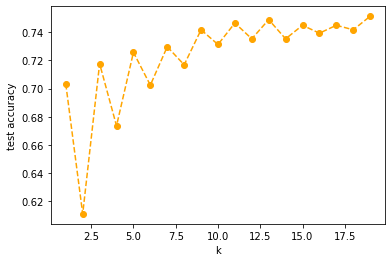

In [46]:
# 시각화
plt.plot(k_range, accuracy_list, 'o--', color = 'orange')
plt.xlabel("k")
plt.ylabel("test accuracy")
plt.show()

* accuracy가 가장 높은 지점은 k가 19인 지점이지만 k값이 너무 크다면 다른 범주의 개체를 너무 많이 포함하여 오분류할 위험이 있고, 너무 작아도 오버피팅의 위험이 있기 때문에 비교적 높은 accuracy를 가지면서 k의 값이 크지도 작지도 않은 9를 최적의 k로 설정하였다.

### Distance type 결정

In [50]:
from tqdm import tqdm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score

####  1. Euclidean distance
* 가장 흔히 사용되는 거리측도이다.
* 대응되는 x, y 값 간 차이 제곱합의 제곱근으로써, 두 관측치 사이의 직선 거리를 의미한다.

In [51]:
k_list = [i for i in range(1, 100) if i%2 !=0] 

euc = []
for k in tqdm(k_list):
    classifier = KNeighborsClassifier(n_neighbors = k, p=2)
    scores = cross_val_score(classifier, X_train, y_train, cv=10, scoring='accuracy')
    euc.append(scores.mean())

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:29<00:00,  1.70it/s]


#### 2. Manhattan Distance
* x에서 y로 이동 시 각 좌표축 방향으로만 이동할 경우에 계산되는 거리이다.

In [52]:
k_list = [i for i in range(1, 100) if i%2 !=0] 

man = []
for k in tqdm(k_list):
    classifier = KNeighborsClassifier(n_neighbors = k, p=1)
    scores = cross_val_score(classifier, X_train, y_train, cv=10, scoring='accuracy')
    man.append(scores.mean())

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [01:20<00:00,  1.60s/it]


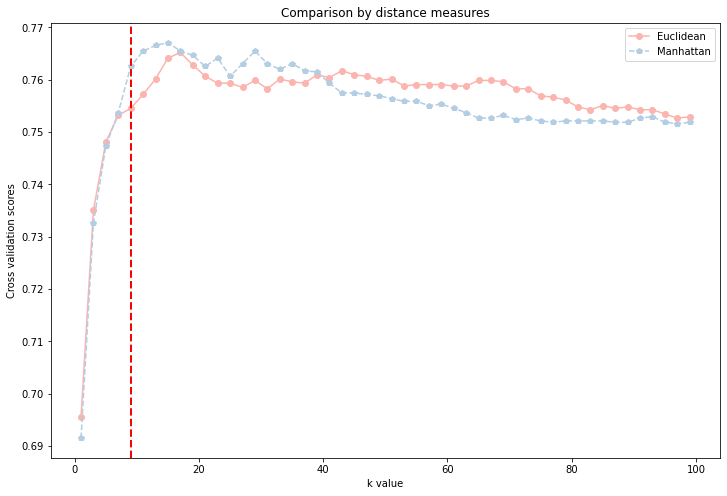

In [56]:
#distance type에 따른 cross validation score 시각화
plt.figure(figsize=(12,8))
plt.plot(k_list, euc, marker='o')
plt.plot(k_list, man, linestyle='dashed', marker='p')
plt.axvline(9, color='r', linestyle='--', linewidth=2)
plt.xlabel('k value')
plt.ylabel('Cross validation scores')
plt.title('Comparison by distance measures')
plt.legend(['Euclidean', 'Manhattan'])
plt.show()

## 3. evaluation

**최종모델:** Manhattan Distance & k=9

In [57]:
classifier = KNeighborsClassifier(n_neighbors = 9, p=1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

acc = accuracy_score(y_true = y_test, y_pred = y_pred) # 정확도
recall = recall_score(y_true = y_test, y_pred = y_pred) # 민감도
precision = precision_score(y_true = y_test, y_pred = y_pred) # 정밀도

print(f"정확도:{acc:0.2f}", f"민감도:{recall:0.2f}", f"정밀도:{precision:0.2f}", sep=' | ')

정확도:0.74 | 민감도:0.92 | 정밀도:0.78


* k가 9인 지점에서 Manhattan Distance의 cross validation scores가 Euclidean distance보다 높게 나왔기 때문에 더 적합한 거리 계산 공식은 Manhattan Distance라고 판단하였다.
* 따라서 최종 모델에는 Manhattan Distance 와 k = 9를 적용하였다.
* 그 결과 정확도는 0.74, 민감도는 0.92, 정밀도는 0.78을 얻었으며, 따라서 모델이 데이터의 분류를 잘했다고 판단할 수 있다.